<img src= "image loan.jpg">

## Loan Prediction
 Problem
• A Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status,
Education, Number of Dependents, Income, Loan Amount, Credit History and others. To
automate this process, they have given a problem to identify the customers segments, those
are eligible for loan amount so that they can specifically target these customers. Here they
have provided a data set.

## Data
• Variable Descriptions:
Variable Description
Loan_ID Unique Loan ID
Gender Male/ Female
Married Applicant married (Y/N)
Dependents Number of dependents
Education Applicant Education (Graduate/ Under Graduate)
Self_Employed Self employed (Y/N)
ApplicantIncome Applicant income
CoapplicantIncome Coapplicant income
LoanAmount Loan amount in thousands
Loan_Amount_Term Term of loan in months
Credit_History credit history meets guidelines
Property_Area Urban/ Semi Urban/ Rural
Loan_Status Loan approved (Y/N)


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot 
import seaborn as sns
import math

In [2]:
train_data=pd.read_csv("train.csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test_data=pd.read_csv("test.csv")
test_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


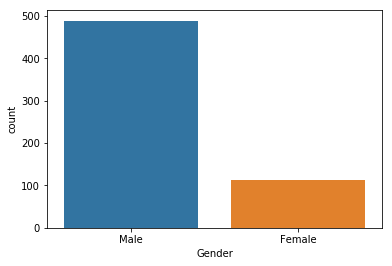

In [4]:
sns.countplot('Gender',data=train_data)

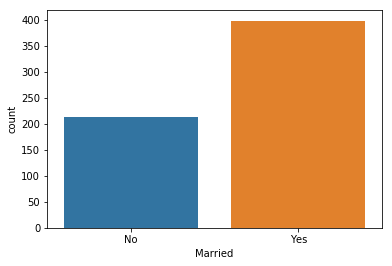

In [5]:
sns.countplot("Married",data=train_data)

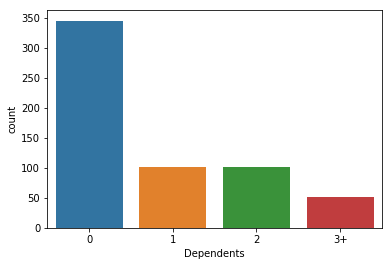

In [6]:
sns.countplot('Dependents',data=train_data)

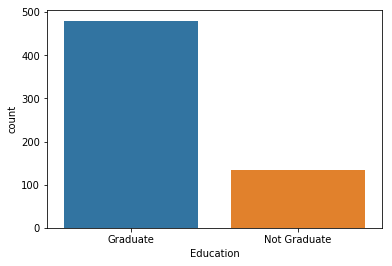

In [7]:
sns.countplot("Education",data=train_data)

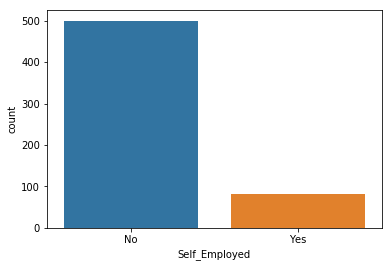

In [8]:
sns.countplot('Self_Employed',data=train_data)

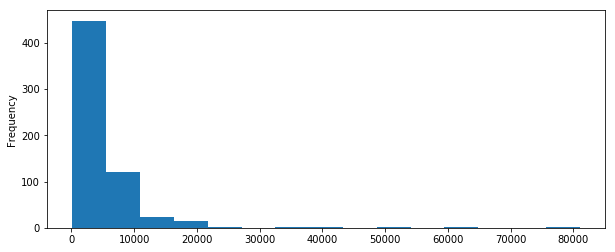

In [9]:
train_data['ApplicantIncome'].plot.hist(bins=15,figsize=(10,4))
                                       

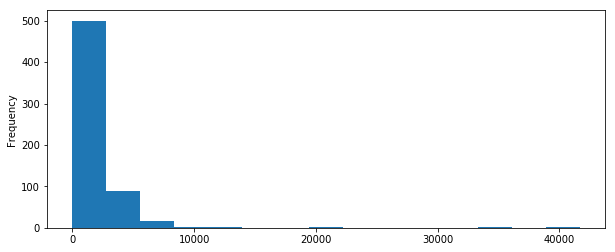

In [10]:
train_data['CoapplicantIncome'].plot.hist(bins=15,figsize=(10,4))

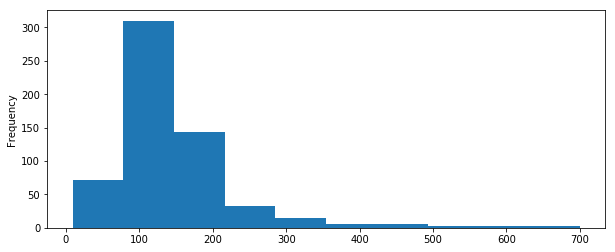

In [11]:
train_data['LoanAmount'].plot.hist(bins=10,figsize=(10,4))

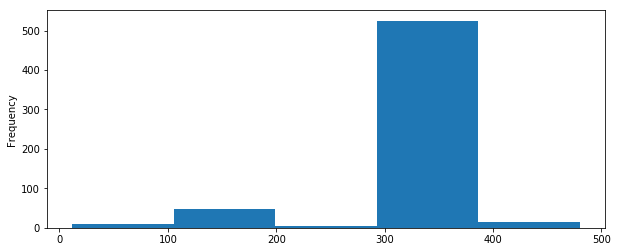

In [12]:
train_data['Loan_Amount_Term'].plot.hist(bins=5,figsize=(10,4))

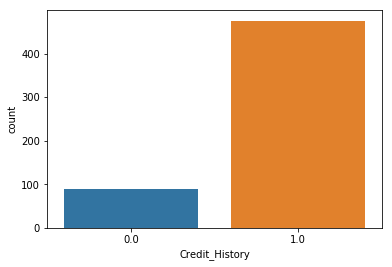

In [13]:
sns.countplot('Credit_History',data=train_data)

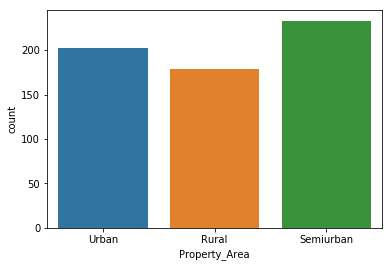

In [14]:
sns.countplot("Property_Area",data=train_data)
             

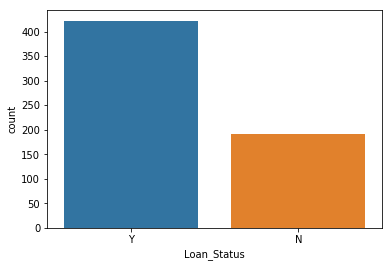

In [15]:
sns.countplot("Loan_Status",data=train_data)

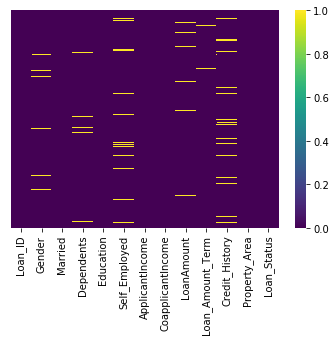

In [16]:
sns.heatmap(train_data.isnull(),yticklabels=False,cmap='viridis')

In [17]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
#Imputing Missing values with mean for continuous variable
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)
#train_data['LoanAmount_log'].fillna(train_data['LoanAmount_log'].mean(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean(), inplace=True)
train_data['ApplicantIncome'].fillna(train_data['ApplicantIncome'].mean(), inplace=True)
train_data['CoapplicantIncome'].fillna(train_data['CoapplicantIncome'].mean(), inplace=True)

In [19]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
#Imputing Missing values with mode for categorical variables
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
#train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0],inplace=True)

In [21]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [23]:
Gender=pd.get_dummies(train_data['Gender'],drop_first=True)
Gender.head()

,Male
0,1
1,1
2,1
3,1
4,1


In [24]:
Education=pd.get_dummies(train_data['Education'],drop_first=True)
Education.head()                         

,Not Graduate
0,0
1,0
2,0
3,1
4,0


In [25]:
Property_Area=pd.get_dummies(train_data['Property_Area'],drop_first=True)
Property_Area.head()

,Semiurban,Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
Loan_Status=pd.get_dummies(train_data['Loan_Status'],drop_first=True)
Loan_Status.head()

,Y
0,1
1,0
2,1
3,1
4,1


In [27]:
Dependents=pd.get_dummies(train_data['Dependents'],drop_first=True)
Dependents.head()

,1,2,3+
0,0,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [28]:
Married=pd.get_dummies(train_data['Married'],drop_first=True)
Married.head()

,Yes
0,0
1,1
2,1
3,1
4,0


In [29]:
Self_Employed=pd.get_dummies(train_data['Self_Employed'],drop_first=True)
Self_Employed.head()

,Yes
0,0
1,0
2,1
3,0
4,0


In [30]:
train_data=pd.concat([train_data,Property_Area,Education,Gender,Loan_Status,Self_Employed,Married,Dependents],axis=1)

In [31]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Semiurban,Urban,Not Graduate,Male,Y,Yes,Yes,1,2,3+
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,...,0,1,0,1,1,0,0,0,0,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,...,0,0,0,1,0,0,1,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,...,0,1,0,1,1,1,1,0,0,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,...,0,1,1,1,1,0,1,0,0,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,...,0,1,0,1,1,0,0,0,0,0


In [32]:
train_data.drop(['Property_Area','Education','Gender','Loan_ID','Loan_Status','Married','Self_Employed','Dependents'],axis=1,inplace=True)


In [33]:
train_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban,Not Graduate,Male,Y,Yes,Yes,1,2,3+
0,5849,0.0,146.412162,360.0,1.0,0,1,0,1,1,0,0,0,0,0
1,4583,1508.0,128.000000,360.0,1.0,0,0,0,1,0,0,1,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,1,1,0,0,0
3,2583,2358.0,120.000000,360.0,1.0,0,1,1,1,1,0,1,0,0,0
4,6000,0.0,141.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,0


In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
X=train_data.drop('Y',axis=1)
y=train_data['Y']

In [36]:
from sklearn.model_selection import train_test_split


In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [38]:
logmodel=LogisticRegression()

In [39]:
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
Yhat=logmodel.predict(X_train)
Yhat[0:5]

array([1, 1, 0, 0, 1], dtype=uint8)

In [41]:
predictions=logmodel.predict(X_test)
predictions[0:5]

array([1, 1, 1, 1, 1], dtype=uint8)

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.41      0.57        61
           1       0.77      0.98      0.87       124

   micro avg       0.79      0.79      0.79       185
   macro avg       0.85      0.70      0.72       185
weighted avg       0.82      0.79      0.77       185



In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(y_test,predictions)

array([[ 25,  36],
       [  2, 122]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test,predictions)

0.7945945945945946